# Implementasi Klasifikasi K-NN dengan python

### Firman Naufal Aryaputra(A11.2022.14181)

### Penambangan Data(A11.4509)

## Import library yang digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np

## Import Dataset

In [2]:
dataset = pd.read_csv('D:\Kuliah\SEM 5\Data Mining\Tugas Pertemuan 6\dataset.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\HP\AppData\Local\Temp\ipykernel_21828\1034253579.py:1: SyntaxWarning: invalid escape sequence '\K'
  dataset = pd.read_csv('D:\Kuliah\SEM 5\Data Mining\Tugas Pertemuan 6\dataset.csv')


## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scalling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


## Training the K-NN model on the Training set


In [5]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier (n_neighbors  = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  2]
 [ 6 34]]


## Visualising the Training set results

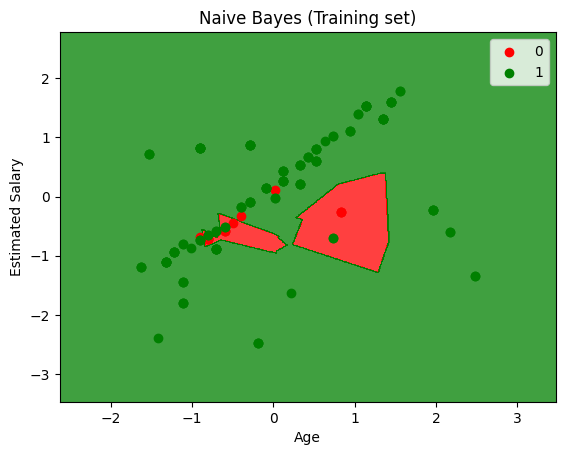

In [8]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


colors = ListedColormap(('red', 'green'))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors(i), label=j 
    )

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

## Visualising the Test set results

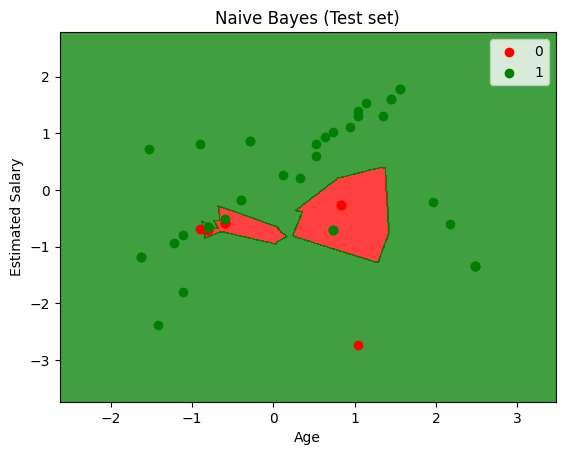

In [9]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=ListedColormap(('red', 'green'))(i), label=j
    )

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()